<h1> Has Quarantine Changed Our Queues? </h1>
Understanding the impact of COVID-19 Quarantine on our Spotify streaming <br>

 ANDERS JENSEN, Cornell University <br> 
 KAELA OLSEN, Cornell University <br>

<h4> May 22nd, 2020 <br>
Info 2950: Intro to Data Science </h4>

<h2> Introduction </h2>

<p>In the span of a few months, the global economy and livelihoods of everyday people completely shut down due to the worldwide spread of COVID-19. Many researchers investigate potentially harmful psychological effects of this experience. Longer quarantine duration is starting to show links to frustration, boredom, and depression, in addition to the financial losses many families are enduring. These hypotheses are speculative, and more research must assess the effect quarantine is having on people’s mental health.</p> 

<p>Even before this pandemic, a standard outlet for people to release some stress was music. Listening to music is often soothing for people under any circumstances. Further, access to music has become extremely easy. Spotify is the largest subscription music streaming service with 170 million users, providing premium audio quality at 320kbps, higher than any competitor, including Apple music.</p> 

<p> Even before this pandemic, a common outlet for people to release some stress was music. Listening to music is often soothing for people under any circumstances. Further, access to music has become extremely easy. Spotify is the largest subscription music streaming service with 170 million users, providing premium audio quality at 320kbps, higher than any competitor, including Apple music.</p> 


<h4>Research Questions:</h4> 

This research study analyzes COVID-19 quarantine's effect on people's music choices, using Spotify to track these changes. By interpreting songs' specific audio features, we can illustrate how this quarantine affects people's mental well-being. Has the quarantine made people listen to more sad and depressing music? Or, are people listening to uplifting music? How has the pandemic affected what type of music to which we listened?


<h4>Main Findings:</h4> 

The audio features of the quarantine dataset varied in several ways from the 2019 dataset. The music we are listening to in isolation had 9.09% less energy, 4.53% less valence, and a 2.31% slower tempo. Acoustic (+10.86%) and speechy (+14.32%) music were more common, while the percentage of explicit songs nearly doubled (+88.36). Meanwhile, danceability, key, and mode had small, hard to explain changes, leaving room for further investigation.

To understand how statistically significant our data is, we implemented two tests: permutation tests (or randomization tests), and a two-sample t-test for sample means. Our null hypothesis, for all variables, was that there was no difference between the means for our 2019 songs sample and our Quarantine songs sample. If our null hypothesis is correct, then the permuted (randomized) data sets should give roughly the same test-statistic as our real data. The ranking of our real test-statistic among the shuffled test statistics gives a p-value, which we compared to our t-test of sample means p-value.

Through the above process, we confirmed that statistically significant evidence suggests people's music choices have changed during quarantine through this process. Let us see how.

<h2> Data Description </h2>
<br>
Spotify is an audio streaming platform that provides easy access to over 50 million tracks, allowing users to filter by artist, album, or genre, and create unique playlists to complement their music taste. Individuals who create an account on Spotify agree to share their listening data with the public. However, users fail to notice the data collection process: precisely what, how, why, and when data is collected. User data improves algorithms that offer music recommendations to users, while providing opportunities for research on Spotify's data. The creation of this dataset was made possible by Spotify's Web API, through which web developers can access catalog data for the creation of apps or software.

Various processes influenced what data was observed and recorded. The first factor is whether a playlist was public or not, as we only collected data on public playlists. Secondly, we filtered "quarantine" playlists based on if their title and playlist description contained "quarantine," and our "2019" playlists with the term "2019." However, this could have been altered by using "Coronavirus" or "COVID" instead of "quarantine." However, the addition of terms would overload our dataset, so we only used "quarantine." Another process that influenced data observation was the search limitations on Spotify, which only allowed users to receive two thousand results per search with Spotify API, limiting the number of data points we could record and analyze.

The preprocessing that Spotify did was pairing each playlist and each song with a Uniform Resource Identifier (URI). Spotify matches each URI with the playlist name, and within each playlist unit, lists each track and its relevant data. Through accessing the URI's, we can see the data paired for each.

After searching "quarantine"- and "2019"-containing playlists, we extracted the playlist names, URIs, and track numbers, loading it into playlists.csv. Then, for each playlist URI, we used Spotipy's playlist_tracks() to extract each track's URI. Once we had the list of raw track data, we created a function called filter_data(), which used Spotipy's track() to access the name, popularity, release date, and explicitness of each song, and then Spotipy's audio_features() function to access variables like "danceability," "energy," "key," and "loudness," loading them into two CSV files: tracks.csv and tracks_2019.csv. In both datasets, each observation (row) represents a song from in a playlist with either "quarantine" or "2019" in the title or description, respectively. There were 24 columns for each song, including the URI, the release date, and several audio features.

Our Source data is in our Github folder under the name "datascraping_quar.ipynb" for our quarantine song data and "datascraping_2019.ipynb" for our 2019 song data.

<h2> Data Analysis </h2>
<p> To begin, let's take a look at the two data sets: Quarantine Songs, and 2019 Songs. </p>

<h3> Quarantine Songs: </h3>

In [1]:
#import python libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import spearmanr, t

In [2]:
tracks_quar = pd.read_csv("tracks_list.csv")
#shows a snippet of 20 songs sorted by appearances
tracks_quar.sort_values(by=['count'], ascending=False)[:10]

,Unnamed: 0,uri,count,name,release_date,popularity,explicit,danceability,energy,key,...,instrumentalness,liveness,valence,tempo,type,id,track_href,analysis_url,duration_ms,time_signature
119,221,spotify:track:127QTOFJsJQp5LbJbu3A1y,176,Toosie Slide,2020-04-03,99,True,0.834,0.454,1,...,0.000006,0.1140,0.837,81.618,audio_features,127QTOFJsJQp5LbJbu3A1y,https://api.spotify.com/v1/tracks/127QTOFJsJQp...,https://api.spotify.com/v1/audio-analysis/127Q...,247059,4
146,259,spotify:track:1Cv1YLb4q0RzL6pybtaMLo,172,Sunday Best,2019-01-06,96,False,0.878,0.525,5,...,0.000000,0.0714,0.694,112.022,audio_features,1Cv1YLb4q0RzL6pybtaMLo,https://api.spotify.com/v1/tracks/1Cv1YLb4q0Rz...,https://api.spotify.com/v1/audio-analysis/1Cv1...,158571,4
1002,2564,spotify:track:7eJMfftS33KTjuF7lTsMCx,155,death bed (coffee for your head) (feat. beabad...,2020-02-08,99,False,0.726,0.431,8,...,0.000000,0.6960,0.348,144.026,audio_features,7eJMfftS33KTjuF7lTsMCx,https://api.spotify.com/v1/tracks/7eJMfftS33KT...,https://api.spotify.com/v1/audio-analysis/7eJM...,173333,4
116,218,spotify:track:6WrI0LAC5M1Rw2MnX2ZvEg,151,Don't Start Now,2019-10-31,97,False,0.794,0.793,11,...,0.000000,0.0952,0.677,123.941,audio_features,6WrI0LAC5M1Rw2MnX2ZvEg,https://api.spotify.com/v1/tracks/6WrI0LAC5M1R...,https://api.spotify.com/v1/audio-analysis/6WrI...,183290,4
1006,2569,spotify:track:0nbXyq5TXYPCO7pr3N8S4I,147,The Box,2019-12-06,99,True,0.896,0.586,10,...,0.000000,0.7900,0.642,116.971,audio_features,0nbXyq5TXYPCO7pr3N8S4I,https://api.spotify.com/v1/tracks/0nbXyq5TXYPC...,https://api.spotify.com/v1/audio-analysis/0nbX...,196653,4
1753,6284,spotify:track:0VjIjW4GlUZAMYd2vXMi3b,139,Blinding Lights,2020-03-20,100,False,0.514,0.730,1,...,0.000095,0.0897,0.334,171.005,audio_features,0VjIjW4GlUZAMYd2vXMi3b,https://api.spotify.com/v1/tracks/0VjIjW4GlUZA...,https://api.spotify.com/v1/audio-analysis/0VjI...,200040,4
118,220,spotify:track:0sf12qNH5qcw8qpgymFOqD,136,Blinding Lights,2019-11-29,93,False,0.513,0.796,1,...,0.000209,0.0938,0.345,171.017,audio_features,0sf12qNH5qcw8qpgymFOqD,https://api.spotify.com/v1/tracks/0sf12qNH5qcw...,https://api.spotify.com/v1/audio-analysis/0sf1...,201573,4
144,257,spotify:track:3Dv1eDb0MEgF93GpLXlucZ,133,Say So,2019-11-07,97,True,0.787,0.673,11,...,0.000004,0.0904,0.786,110.962,audio_features,3Dv1eDb0MEgF93GpLXlucZ,https://api.spotify.com/v1/tracks/3Dv1eDb0MEgF...,https://api.spotify.com/v1/audio-analysis/3Dv1...,237893,4
846,1723,spotify:track:6K4t31amVTZDgR3sKmwUJJ,132,The Less I Know The Better,2015-07-17,86,True,0.640,0.740,4,...,0.006780,0.1670,0.785,116.879,audio_features,6K4t31amVTZDgR3sKmwUJJ,https://api.spotify.com/v1/tracks/6K4t31amVTZD...,https://api.spotify.com/v1/audio-analysis/6K4t...,216320,4
433,809,spotify:track:4nK5YrxbMGZstTLbvj6Gxw,130,Supalonely,2019-11-15,95,True,0.863,0.631,7,...,0.000030,0.1230,0.817,128.977,audio_features,4nK5YrxbMGZstTLbvj6Gxw,https://api.spotify.com/v1/tracks/4nK5YrxbMGZs...,https://api.spotify.com/v1/audio-analysis/4nK5...,223480,4


<h3> 2019 Tracks: </h3>

In [3]:
tracks_2019 = pd.read_csv("tracks_list_2019.csv")
tracks_2019.sort_values(by=['count'], ascending=False)[:10]

,Unnamed: 0,acousticness,analysis_url,count,danceability,duration_ms,energy,explicit,id,instrumentalness,...,name,popularity,release_date,speechiness,tempo,time_signature,track_href,type,uri,valence
937,1650,0.3280,https://api.spotify.com/v1/audio-analysis/2Fxm...,183,0.701,194088,0.425,False,2Fxmhks0bxGSBdJ92vM42m,0.130000,...,bad guy,92,2019-03-29,0.3750,135.128,4,https://api.spotify.com/v1/tracks/2Fxmhks0bxGS...,audio_features,spotify:track:2Fxmhks0bxGSBdJ92vM42m,0.562
803,1415,0.0370,https://api.spotify.com/v1/audio-analysis/0TK2...,149,0.759,190960,0.540,False,0TK2YIli7K1leLovkQiNik,0.000000,...,Señorita,88,2019-06-21,0.0287,116.947,4,https://api.spotify.com/v1/tracks/0TK2YIli7K1l...,audio_features,spotify:track:0TK2YIli7K1leLovkQiNik,0.750
1570,3059,0.1100,https://api.spotify.com/v1/audio-analysis/5w9c...,146,0.737,193227,0.860,False,5w9c2J52mkdntKOmRLeM2m,0.000002,...,Con Calma,83,2019-01-24,0.0593,93.989,4,https://api.spotify.com/v1/tracks/5w9c2J52mkdn...,audio_features,spotify:track:5w9c2J52mkdntKOmRLeM2m,0.656
1408,2475,0.0846,https://api.spotify.com/v1/audio-analysis/2ksO...,140,0.786,301714,0.808,False,2ksOAxtIxY8yElEWw8RhgK,0.000289,...,China,86,2019-07-19,0.0882,105.027,4,https://api.spotify.com/v1/tracks/2ksOAxtIxY8y...,audio_features,spotify:track:2ksOAxtIxY8yElEWw8RhgK,0.609
1571,3060,0.3900,https://api.spotify.com/v1/audio-analysis/2qG5...,130,0.882,161627,0.689,False,2qG5sZ7Si6sdK74qLxedYM,0.003250,...,Con Altura,82,2019-03-28,0.1240,97.963,4,https://api.spotify.com/v1/tracks/2qG5sZ7Si6sd...,audio_features,spotify:track:2qG5sZ7Si6sdK74qLxedYM,0.746
1407,2473,0.0334,https://api.spotify.com/v1/audio-analysis/6cy3...,128,0.721,221714,0.716,True,6cy3ki60hLwimwIje7tALf,0.000840,...,RITMO (Bad Boys For Life),89,2019-10-12,0.0657,104.994,4,https://api.spotify.com/v1/tracks/6cy3ki60hLwi...,audio_features,spotify:track:6cy3ki60hLwimwIje7tALf,0.667
1757,3571,0.0125,https://api.spotify.com/v1/audio-analysis/6WrI...,111,0.794,183290,0.793,False,6WrI0LAC5M1Rw2MnX2ZvEg,0.000000,...,Don't Start Now,94,2019-10-31,0.0842,123.941,4,https://api.spotify.com/v1/tracks/6WrI0LAC5M1R...,audio_features,spotify:track:6WrI0LAC5M1Rw2MnX2ZvEg,0.677
1374,2416,0.2950,https://api.spotify.com/v1/audio-analysis/7k4t...,110,0.803,200960,0.715,False,7k4t7uLgtOxPwTpFmtJNTY,0.000134,...,Tusa,93,2019-11-07,0.2980,101.085,4,https://api.spotify.com/v1/tracks/7k4t7uLgtOxP...,audio_features,spotify:track:7k4t7uLgtOxPwTpFmtJNTY,0.574
832,1463,0.0912,https://api.spotify.com/v1/audio-analysis/3HVW...,110,0.798,219947,0.675,False,3HVWdVOQ0ZA45FuZGSfvns,0.000000,...,I Don't Care (with Justin Bieber),86,2019-05-10,0.0442,101.956,4,https://api.spotify.com/v1/tracks/3HVWdVOQ0ZA4...,audio_features,spotify:track:3HVWdVOQ0ZA45FuZGSfvns,0.842
1421,2496,0.6000,https://api.spotify.com/v1/audio-analysis/2TH6...,110,0.610,250534,0.624,True,2TH65lNHgvLxCKXM3apjxI,0.000002,...,Callaita,86,2019-05-31,0.3090,176.169,4,https://api.spotify.com/v1/tracks/2TH65lNHgvLx...,audio_features,spotify:track:2TH65lNHgvLxCKXM3apjxI,0.244


Now that we have a sense for these two datasets, let's compare the two.

<h2> I. Describing Music: Qualitative Audio Features</h2>

<p>Spotify provides audio analysis for all tracks in Spotify's Catalog, broken into features that describe a song's structure and musical content (like rhythm, pitch, timbre, etc). Each element's score is denoted by an integer or float. We will analyze 10 key audio features in detail, and compare the scores of these audio features between our sample of quarantine songs and 2019 (pre-COVID) songs. Let’s start with four characteristics we consider <em> straightforward </em> and <em>qualitative</em>:</p>
 
1. **Popularity** - The popularity of a song is the most complex feature in this section, but Spotify still assigns this feature an integer value between 0 and 100. The popularity is calculated by an algorithm based mainly on the number and the recency of a track’s plays. 
 
2. **Explicitness**  - Spotify labels a song as explicit if the lyrics or content meet a list of criteria considered unsuitable for children (i.e. strong language and references to violence or sexualized behavior). This audio feature gives explicit songs a score of 1 and non-explicit songs a 0. 
 
3. **Key** - The estimated overall key of the track. This audio feature maps pitches using standard pitch class   notation. For example, 0 = C, 1 = C♯/D♭, 2 = D, and so on. 
 
4. **Mode** - Mode refers to the mode of a track (major or minor), the type of scale from which its melodic content is derived. Major is represented by 1 and minor is represented by a 0 score.

<h3> 1. Popularity </h3>

<p> Does popularity impact the number appearences in quarantine playlists? To answer this question, we will see if there is a correlation between a track's popularity level, and the number of times that song appears in the data set. </p>

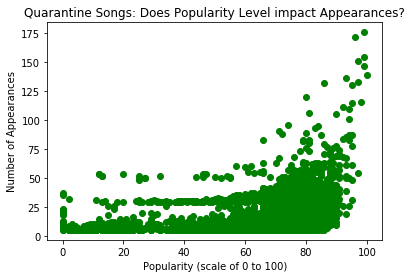

In [4]:
plt.scatter(tracks_quar['popularity'], tracks_quar['count'], marker = 'o', color = 'green')

plt.xlabel("Popularity (scale of 0 to 100)")
plt.ylabel("Number of Appearances")
plt.title("Quarantine Songs: Does Popularity Level impact Appearances?")
plt.show()

<p> There seems to be a clear positive relationship with these two variables. However, it doesn't seem exactly linear. We are interested in understanding the strength of correlation between these two variables. We'll use a variant called rank correlation, where each element of a vector has a rank. </p>

<p>Rank correlation (or Spearman correlation) is very similar to regular correlation (also called Pearson correlation), but it is more robust to relationships that aren't linear. Pearson correlation is to rank correlation as mean is to median.

In [5]:
print("Comparing Correlations for Popularity and Appearances")

corrcoef = np.corrcoef(tracks_quar['popularity'], tracks_quar['count'])[0][1]
rank_corrcoef = np.corrcoef(tracks_quar['popularity'].rank(), tracks_quar['count'].rank())[0][1]

print('Correlation: {:.4f}'.format(corrcoef))
print('Correlation of ranks: {:.4f}'.format(rank_corrcoef))

Comparing Correlations for Popularity and Appearances
Correlation: 0.2644
Correlation of ranks: 0.4717


As we can see, the correlation of ranks is much higher than the linear correlation. This makes sense, as we previously noted that the data is not exactly linear. By comparing the ranks, we can see how the more popular a song is in comparison to the rest of the songs, the more likely it is to be ranked higher in its number of appearances in our quarantine playlists.

<h4> Popularity Conclusion </h4>

<p>From the graphical visualization, it is clear that there is a positive relationship between popularity and the number of appearances in playlists. These two variables are clearly interconnected, as the more popular a song is, the wider its audience, the more well-known it is, and the more likely it is to appear in any one person's playlist. The correlation is quite small because there is clear curvature in the graph. As such, the Spearman R of rank correlation is much higher than the standard linear correlation. Through understanding of the data's context and the graphical representation of the data, popularity clearly impacts the number of appearances in our quarantine tracks.</p>

---

<h3>2.  Explicitness </h3>

In [6]:
#function that creates pie chart for the explicit variable
def explicit_pie(dataset, data_name):
    count = 0
    for i in dataset['explicit']:
        if i == 1:
            count += 1
    percent_explicit = count/len(dataset['explicit'])
    
    explicit =  (percent_explicit*100)
    clean = (1-percent_explicit)*100
    
    labels = 'Explicit', 'Clean'
    fig1, ax1 = plt.subplots()
    
    ax1.pie([explicit, clean], 
            explode = (0, 0.1), 
            autopct='%1.1f%%', 
            colors = ['#1DB954', 'darkgrey'],
            shadow=True, 
            startangle=90)

    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    
    plt.legend(labels, loc="best")
    plt.title("What proportion of " + data_name + " were explicit?")
    plt.show()
    
    #explicit_breakdown = {'explicit': explicit, 'clean': clean}
    explicit_breakdown = [explicit, clean]
    return explicit_breakdown

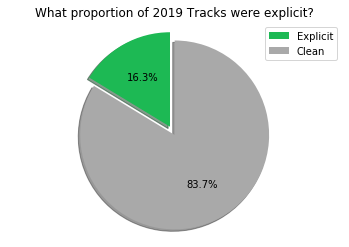

In [7]:
#2019 Tracks
explicit_2019 = explicit_pie(tracks_2019, '2019 Tracks')

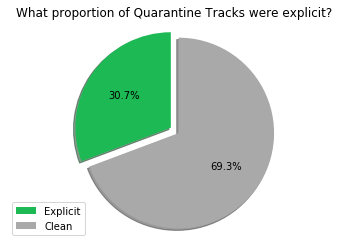

In [8]:
#Quarantine Tracks
explicit_quarantine = explicit_pie(tracks_quar, "Quarantine Tracks")

In [9]:
#reusable function for bar chart creation, comparing a variable across two data sets
def bar_chart(data_2019, data_quar, title, ticks):
    
    bars2019 = data_2019 #green
    barsquar = data_quar #gray
    
    barWidth = 0.3
    r1 = np.arange(len(bars2019))
    r2 = [x + barWidth for x in r1]
    
    plt.bar(r1, bars2019, color='#1DB954', width=barWidth, edgecolor='white', label='2019')
    plt.bar(r2, barsquar, color='darkgrey', width=barWidth, edgecolor='white', label='Quarantine')
    
    plt.xlabel('Tracks')
    plt.ylabel('Percentage of Total')
    plt.title(title)
    plt.xticks([r + 0.15 for r in range(len(bars2019))], ticks)
    
    plt.legend()
    plt.show()

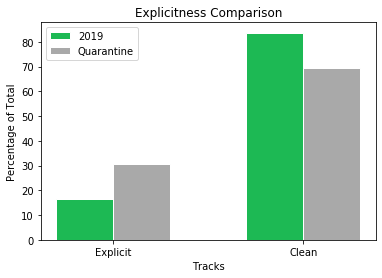

In [10]:
#Bar Chart comparison across 2019 and Quarantine Data
bar_chart(explicit_2019, explicit_quarantine, title = "Explicitness Comparison", ticks = ['Explicit', 'Clean'])

In [11]:
def print_percentages(feature, primary_feature):
    print("Proportion of 2019 songs that are "+str(primary_feature)+":  ")
    print('{:.4f}'.format(np.mean(tracks_2019[feature])))
    
    print("Proportion of Quarantine songs that are "+str(primary_feature)+":  ") 
    print('{:.4f}'.format(np.mean(tracks_quar[feature])))
    
    print()
    print("Difference in proportions from 2019 to Quarantine:")
    print('{:.4f}'.format(np.mean(tracks_quar[feature])-np.mean(tracks_2019[feature])))

    print("Percent change from 2019 to Quarantine:")
    print('{:.2%}'.format((np.mean(tracks_quar[feature])-np.mean(tracks_2019[feature]))/np.mean(tracks_2019[feature])))

In [12]:
print_percentages('explicit', primary_feature = 'Explicit')

Proportion of 2019 songs that are Explicit:  
0.1631
Proportion of Quarantine songs that are Explicit:  
0.3071

Difference in proportions from 2019 to Quarantine:
0.1441
Percent change from 2019 to Quarantine:
88.36%


<h4> Evaluation of Significance: Explicitness </h4> 

The difference in the proportion of explict songs is the key test-statistic for us. We want to hold onto this for future reference, so we are going to create a function that returns the difference in the proportions of our two samples.

In [13]:
def sample_difference(feature):
    _quarantine = np.mean(tracks_quar[feature])
    _2019 = np.mean(tracks_2019[feature])
    difference = _quarantine-_2019
    return round(difference, 6)

In [14]:
sample_difference('explicit')

0.144075

This means the proportion of explicit songs increased by 0.14% of songs from the 2019 dataset to the Quarantine dataset. Next, we must test its statistical significance.

To understand the breakdown between 2019 songs and Quarantine songs, we need to make a single dataframe, where the two datasets are concatenated, and include a new column called "quarantine", where a song's row has a "0" if the song is from the 2019 dataset, and a "1" if the song is from the Quarantine dataset. We do this with concatenate_df( ).

In [15]:
def concatenate_df():
    #creating a list of zeros for each song in 2019 tracks
    zero_list = []
    for x in range(len(tracks_2019)):
        zero_list.append(0)
    
    #creating a list of ones for each song in quarantine tracks
    one_list = []
    for x in range(len(tracks_quar)):
        one_list.append(1)  

    #adding these lists as a column to respective dataframes
    df_quarantine = tracks_quar.assign(quarantine = one_list)
    df_2019 = tracks_2019.assign(quarantine = zero_list)
    
    #concatenating the two dataframes
    new = pd.concat([df_quarantine, df_2019], sort=False)
    
    #turning explicit column from True / False to 1 / 0
    new["explicit"] = new["explicit"].astype(int)
    return new

In [16]:
#creating a new dataframe that combines the 2019 and quarantine datasets
new = concatenate_df()

For all our audio features, we will want to know if our differences between our sample means are statistically significant, against a null hypothesis being that there is none. To test our null hypothesis, we need to see if changing the explanatory variable has an effect on the outcome variable. If our null hypothesis is true, then shuffling the explanatory variable, a 2019 or Quarantine song, would have no effect on the outcome.

Now that we have the concatenated dataframe, we can shuffle the "quarantine" colummn, and thus shuffle the explanatory variable, to see if it influences the shuffled data-set's outcome variable. 

We do this through the permuted_diff_list() function, essentially reassigning the 'quarantine or not quarantine' explanatory variable values to each outcome value. Then, finds the mean value for the shuffled samples, finding the difference between the two sample means. It does this experiment 500 times, performing the permutation for 500 trials, and returns the list of 500 differences of means for the permuted samples.

In [17]:
#returns a list of the permuted differences for 500 trials for the parameter *feature*
def permuted_diff_list(feature):
    
    trials = 500
    diff_list = []
    for x in range(trials):
        
        new['quarantine'] = np.random.permutation(new["quarantine"].copy())

        list_2019 = [] # when 0 means 2019 songs
        list_quar = [] # when 1 means quarantine songs

        for i in range(len(new)):
            if new['quarantine'].iloc[i] == 0:
                list_2019.append(new[feature].iloc[i])
            else:
                list_quar.append(new[feature].iloc[i])
                
        diff_list.append(np.mean(list_2019) - np.mean(list_quar))
        
    return diff_list

In [18]:
explicit_data = permuted_diff_list(feature = 'explicit')

Now that we have run the permutation 500 times, we can plot the distribution of differences of sample means from our 500 permutations, and compare it to the actual difference of sample means from our real data.

In [19]:
#https://stackoverflow.com/questions/16180946/drawing-average-line-in-histogram-matplotlib
def plot_permuted_diff(feature, data, sample):    
    plt.hist(data, bins=50)
    plt.title("Differences In "+str(feature)+" Means From 500 Permutations")
    plt.axvline(sample, color='#1DB954', linewidth=1)
    plt.text(sample, 17 ,'  {:.4f}'.format(sample), color='#1DB954')
    plt.xlabel('Differences')
    plt.ylabel('Count')
    plt.show()
    
    print("The green line represents the difference in our sample means.")

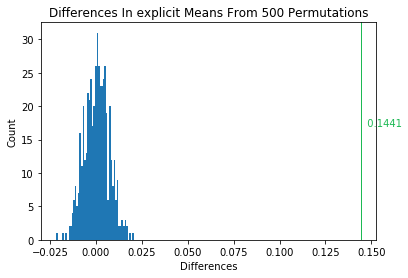

The green line represents the difference in our sample means.
The difference in means of our data:  0.144075


In [20]:
plot_permuted_diff(feature = 'explicit', data = explicit_data, sample = sample_difference('explicit'))
print("The difference in means of our data: ", sample_difference('explicit'))

Clearly, the difference in means found in our data is very far from the distribution of permuted differences. Thus, the difference in the proportion of songs that are explicit from 2019 to Quarantine definitely appear significant. Let's see what it's p-value is. We can find the p-value by comparing our test statistic to the distribution of permutated differences, by the ranking of the real test-statistic for our data among the shuffled test-statistic gave us our p-value, which we compared to an alpha-level of 0.05.

In [21]:
def permutation_p_value(data, feature):
    trials = 500
    count = 0
    for d in data:
        if d > abs(sample_difference(feature)):
            count += 1
    p_value = format((count/trials), '.8f')

    print("Permutation Test Results")
    print(".....")
    print("p_value: ", p_value)

In [22]:
permutation_p_value(data = explicit_data, feature = 'explicit')

Permutation Test Results
.....
p_value:  0.00000000


Clearly, this is an extremely low p-value. Given our null hypothesis (that there is no difference in means) is true, there is a 0% chance we would see these results due to random variation. This p-value is well below our alpha-level of 0.05. Thus, we reject the null hypothesis that there is no difference in means, and accept the alternative, that there is a difference. 

Let's double check this p-value with the results of a t-test for two sample means. The function below performs a two-sample t-test with an alpha level of 0.05, and prints the key test results. 

In [23]:
def t_test_means(feature):
    
    alpha = 0.05
    
    #sample size
    n_2019 = len(tracks_2019[feature])
    n_quar = len(tracks_quar[feature])
    
    #standard error
    se_2019 = tracks_2019[feature].std()/np.sqrt(n_2019)
    se_quar = tracks_quar[feature].std()/np.sqrt(n_quar)
    
    #standard error of differences
    sed = np.sqrt(se_2019**2 + se_quar**2)
    
    #t-statistic
    t_stat =(np.mean(tracks_2019[feature])-np.mean(tracks_quar[feature]))/sed
    
    #degrees of freedom
    df = n_2019 + n_quar - 2

    #critical value using scipy ppf (percent point function)
    cv = t.ppf(1.0-alpha,df)

    #p-value using scipy cdf (cumulative distribution function) for t-distribution 
    p = (1-t.cdf(abs(t_stat), df))**2
    
    print("T-Test Results")
    print(".....")
    print("T-Statistic: " +str(t_stat))
    print("Degress of Freedom: " +str(df))
    print("Critical Value: " +str(cv))
    print("p-value: {:.8f}".format(p))

In [24]:
t_test_means('explicit')

T-Test Results
.....
T-Statistic: -22.100686565206274
Degress of Freedom: 16240
Critical Value: 1.6449474604860919
p-value: 0.00000000


<em> Note: We will use this statistical significance testing process in each of the folloring audio feature sections. </em>

<h4> An Explicit Conclusion? </h4>

<p> There is a clear change in the proportion of explicit content people are listening to during quarantine. Only  16.3% of the 2019 songs featured explicit content, nearly doubling to 30.7% during quarantine (a 14% difference in proportions). As explained during the significance tests, it's almost impossible this was merely due to random chance. </p>

<p> In sum, explicit music has almost doubled... and we thought people were being clean during quarantine!
Jokes aside, this is an interesting conclusion to start with, but we will need more audio features to fully draw out how this pandemic influences our music choices. </p>

---

<h3> 3. Key </h3> 

In [25]:
#Counts the number of songs with each key, returns the percentage of total
def key_breakdown(dataset):
    count_0 = 0
    count_1 = 0
    count_2 = 0
    count_3 = 0
    count_4 = 0
    count_5 = 0
    count_6 = 0
    count_7 = 0
    count_8 = 0
    count_9 = 0
    count_10 = 0
    count_11 = 0
    for i in dataset['key']:
        if i == 0:
            count_0 += 1
        if i == 1:
            count_1 += 1
        if i == 2:
            count_2 += 1
        if i == 3:
            count_3 += 1
        if i == 4:
            count_4 += 1
        if i == 5:
            count_5 += 1
        if i == 6:
            count_6 += 1
        if i == 7:
            count_7 += 1
        if i == 8:
            count_8 += 1
        if i == 9:
            count_9 += 1
        if i == 10:
            count_10 += 1
        if i == 11:
            count_11 += 1
    key_counts = [count_0, count_1, count_2, count_3, count_4, count_5, count_6, count_7, count_8, count_9, count_10, count_11]
    
    key_percentage = []
    for count in key_counts:
        key_perc = (count/len(dataset['key']))*100
        key_percentage.append(key_perc)
    
    return key_percentage

In [26]:
#Creates a pie chart for the keys
def key_pie(key_breakdown, data_name):
    
    labels = 'C', 'C♯/D♭', 'D', 'D♯/E♭', 'E', 'F', 'F#/G♭', 'G', 'G♯/A♭', 'A', 'A♯/B♭', 'B'
    fig1, ax1 = plt.subplots()

    ax1.pie(key_breakdown, 
            explode= (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0), 
            colors = ["#FFD699", "#FFB266", "#FFFF99", "#CCFF99", "#99FFFF", "#9933FF", "#009999", "#99CCFF", "#FF99CC", "#FF0077", "#FFFF00", "#E0E0E0", "#999FF"], 
            autopct='%1.0f%%',
            shadow=True, 
            startangle=90)
    
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.legend(labels, loc="best")
    plt.title("What proportion of " + data_name + " were which keys?")
    plt.show()

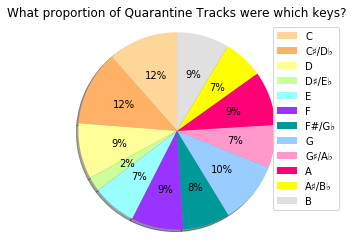

In [27]:
#Quarantine Tracks
key_pie(key_breakdown(tracks_quar), "Quarantine Tracks")

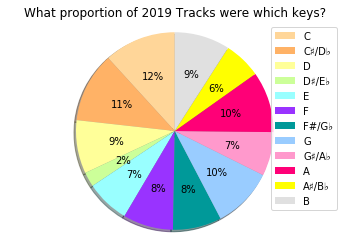

In [28]:
#2019 Tracks
key_pie(key_breakdown(tracks_2019), "2019 Tracks")

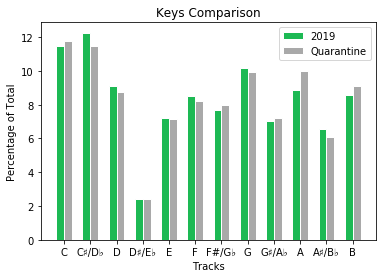

In [29]:
#Bar chart comparing across 2019 and Quarantine Data
bar_chart(key_breakdown(tracks_quar), key_breakdown(tracks_2019), title = "Keys Comparison", ticks = ['C', 'C♯/D♭', 'D', 'D♯/E♭', 'E', 'F', 'F#/G♭', 'G', 'G♯/A♭', 'A', 'A♯/B♭', 'B'])

<h4> Conclusion: Key Takaways </h4>

<p> The pie charts illustrates a few things. First, in both quarantine and 2019 datasets, the most popular Key's were C, and C♯/D♭, accounting for a combined 35% of the dataset. That said, the somewhat even distribution of the chart indicates that the key of a song does not have a <em> dramatic </em> effect on the song's success. In other words, there is no one key that dominates music. Stay away from D# though...
    
<p> More importantly, we see almost no change in the two datasets, illustrating that the quarantine has little effect on the key to which songs are written. As this categorical variable shows little change, we do not think proving the significance of these differences is as informative. This wasn't the <em> key </em> to our research, unfortunately.</p>

---

<h3>4. Mode </h3>

In [30]:
def mode_counter(dataset, data_name):
    print(data_name)
    #Major keys are denoted as 1, Minor keys denoted as 0
    #Could combine this function with pie chart function
    count_major = 0
    count_minor = 0
    for i in dataset['mode']:
        if i == 1:
            count_major += 1
        if i == 0:
            count_minor += 1
    
    print("count_major: ", count_major)
    print("count_minor: ", count_minor)
    
    percent_major = count_major/len(dataset['mode'])
    print('percent_major: ','{:.2%}'.format(percent_major))
    
    mode_breakdown = [count_major/len(dataset['mode']), count_minor/len(dataset['mode'])]
    
    return mode_breakdown

In [31]:
def mode_pie(breakdown, data_name):
    labels = 'Major', 'Minor'
    sizes = breakdown
    
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, 
            explode = (0.1, 0),  
            autopct = '%1.1f%%', 
            colors = ['#1DB954', 'darkgrey'],
            shadow = True, 
            startangle=90)
    
    plt.legend(labels, loc="best")
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title(data_name + ": Major or Minor?")
    plt.show()

Quarantine Tracks
count_major:  5576
count_minor:  3368
percent_major:  62.34%


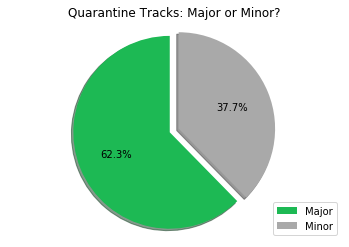

In [32]:
#Quarantine Tracks
mode_breakdown_quarantine = mode_counter(tracks_quar, "Quarantine Tracks")
mode_pie(mode_breakdown_quarantine,"Quarantine Tracks")

2019 Tracks
count_major:  4398
count_minor:  2900
percent_major:  60.26%


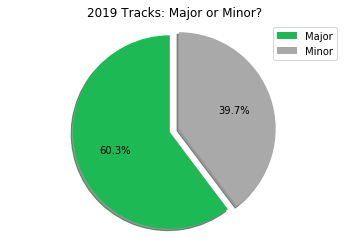

In [33]:
#2019 Tracks
mode_breakdown_2019 = mode_counter(tracks_2019, "2019 Tracks")
mode_pie(mode_breakdown_2019, "2019 Tracks")

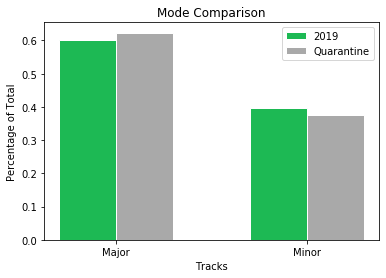

In [34]:
#Bar chart comparing across 2019 and Quarantine Data
bar_chart(mode_breakdown_2019, mode_breakdown_quarantine, title = "Mode Comparison", ticks = ["Major", "Minor"] )

In [35]:
print_percentages('mode', 'Major')

Proportion of 2019 songs that are Major:  
0.6026
Proportion of Quarantine songs that are Major:  
0.6234

Difference in proportions from 2019 to Quarantine:
0.0208
Percent change from 2019 to Quarantine:
3.45%


<h4> Evaluation of Significance: Mode </h4> 

In [85]:
print("The difference in mean mode between Quarantine and 2019 songs:")
print(sample_difference('mode'))

The difference in mean mode between Quarantine and 2019 songs:
0.020804


In [37]:
mode_data = permuted_diff_list(feature = 'mode')

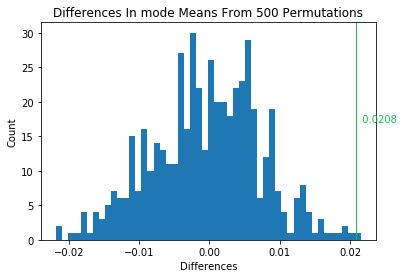

The green line represents the difference in our sample means.
The difference in means of our data:  0.020804


In [38]:
plot_permuted_diff(feature = 'mode', data = mode_data, sample = sample_difference('mode'))
print("The difference in means of our data: ", sample_difference('mode'))

In [39]:
permutation_p_value(data = mode_data, feature = 'mode')

Permutation Test Results
.....
p_value:  0.00200000


In [40]:
t_test_means(feature = 'mode')

T-Test Results
.....
T-Statistic: -2.706863775370696
Degress of Freedom: 16240
Critical Value: 1.6449474604860919
p-value: 0.00001156


<h4> Conclusion: Does Mood Affect the Mode? </h4>
<p> The Quarantine dataset had a 0.0208 higher average mode than the 2019's tracks. As we counted songs that were in Minor as 0, and Major in 1, the proportion of songs that were in Major changed by 0.02 from the 2019 to the Quarantine datset. To put it simply, the quaranatine songs were cheerier. This is encouraging, indicating music might be improving people's mood during this difficult time. The simulations provided a P-value of 0.002, while the T-test provided an even smaller P-value approaching 0.000012. As our datasets are both massive (8000+ songs), a 2% change in mode is statistically significant, and meaningful. 

---
---

<h2> II. Describing Music: Quantitative Audio Features </h2>

Next, we will analyze six complex audio features that Spotify denotes as floats, providing a sort of road map for each song. These remaining, quantitative, features include: 
 
5. **Energy** - The energy of a song represents a perceptual measure of intensity and activity, including dynamic range, perceived loudness, timbre, onset rate, and general entropy. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. 
  
6. **Danceability** - This audio feature is similar to energy, describing how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity.
 
7. **Valence** - A song's valence score describes the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
 
8. **Acousticness** -  This is a confidence measure that determines whether a track is acoustic. Scores range from 0.0 to 1.0, providing a spectrum of musical range in between. 
 
9. **Speechiness** - This feature detects the presence of spoken words in a track, especially useful in separating rap-music and genres with a high-concentration of speech/vocals from other types of music, such as classical. Tracks of this nature receive a score close to 1.0. 
 
10. **Tempo** - Finally, tempo is the speed or pace of a given song, derived directly from the average beat duration, in beats per minute.

<h3> 5. Energy </h3>

In [41]:
#creates a box plot that compares one feature across quarantine tracks and 2019 tracks
def box_plot_comparisons(feature):
    
    x = tracks_2019[feature]
    y = tracks_quar[feature] 
    
    data_to_plot = x, y
    fig = plt.figure(1, figsize=(8, 7))
    ax = fig.add_subplot(111)
    bp = ax.boxplot(data_to_plot)
    bp = ax.boxplot(data_to_plot, patch_artist=True)
    
    for box in bp['boxes']:
        box.set( color='black', linewidth=2)
        box.set( facecolor = '#1DB954' )
    
    for whisker in bp['whiskers']:
        whisker.set(color='black', linewidth=2)
    
    for cap in bp['caps']:
        cap.set(color='black', linewidth=2)
    
    for median in bp['medians']:
        median.set(color='#b2df8a', linewidth=2)
    
    for flier in bp['fliers']:
        flier.set(marker='o', color='#e7298a', alpha=0.5)
    
    ax.set_xticklabels(['2019 Tracks', 'Quarantine Songs'])
    plt.title(feature + ": Quarantine vs. 2019")
    plt.ylabel("Scale")
    plt.show()

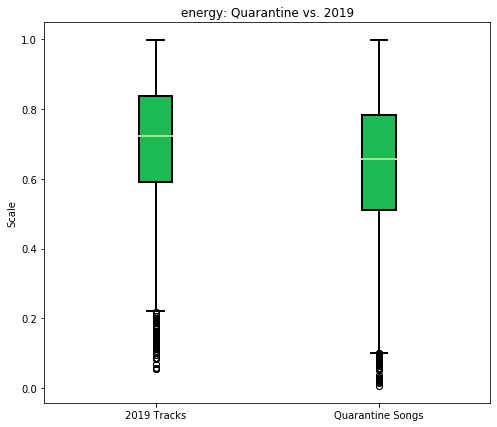

In [42]:
box_plot_comparisons('energy')

In [43]:
def print_means(feature):
    print("Mean "+str(feature)+" value for 2019:  ")
    print('{:.4f}'.format(np.mean(tracks_2019[feature])))
    
    print("Mean "+str(feature)+" value for Quarantine:  ") 
    print('{:.4f}'.format(np.mean(tracks_quar[feature])))
    
    print()
    print("Difference in means from 2019 to Quarantine:")
    print('{:.4f}'.format(np.mean(tracks_quar[feature])-np.mean(tracks_2019[feature])))
    
    print("Percent change from 2019 mean to Quarantine mean:")
    percent_change = (np.mean(tracks_quar[feature])-np.mean(tracks_2019[feature]))/np.mean(tracks_2019[feature])
    print('{:.2%}'.format(percent_change))

In [44]:
print_means('energy')

Mean energy value for 2019:  
0.7014
Mean energy value for Quarantine:  
0.6376

Difference in means from 2019 to Quarantine:
-0.0637
Percent change from 2019 mean to Quarantine mean:
-9.09%


<h4> Evaluation of Significance: Energy </h4> 

In [45]:
energy_data = permuted_diff_list(feature = 'energy')

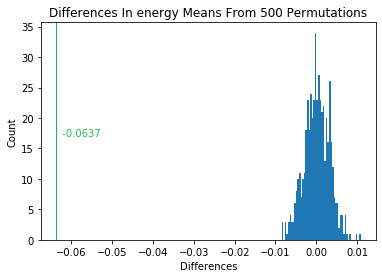

The green line represents the difference in our sample means.
The difference in means of our data:  -0.063739


In [46]:
plot_permuted_diff(feature = 'energy', data = energy_data, sample = sample_difference('energy'))
print("The difference in means of our data: ", sample_difference('energy'))

In [47]:
permutation_p_value(data = energy_data, feature = 'energy')

Permutation Test Results
.....
p_value:  0.00000000


In [48]:
t_test_means(feature = 'energy')

T-Test Results
.....
T-Statistic: 22.17580623566197
Degress of Freedom: 16240
Critical Value: 1.6449474604860919
p-value: 0.00000000


<h4> Conclusion: Effect on Energy </h4>
    
<p> The average energy of Quarantine songs decreased by approximately 0.0637 from 2019 songs -- a drop in overall loudness, timbre, onset rate, and general entropy potentially induced by the closing of bars, clubs, venues, and house parties. Our simulations provided a p-value approaching 0.000000..., and our t-test provided the same. A 0.637 difference in means is certainly statistically significant, further guiding our conclusions about the effect of isolation on music choice. </p>

---

<h3> 6. Danceability </h3>

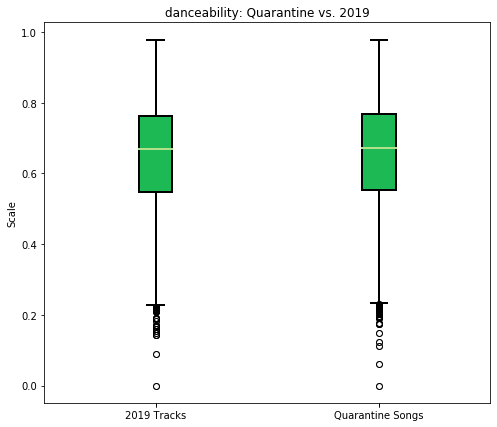

In [49]:
box_plot_comparisons('danceability')

In [50]:
print_means('danceability')

Mean danceability value for 2019:  
0.6489
Mean danceability value for Quarantine:  
0.6566

Difference in means from 2019 to Quarantine:
0.0077
Percent change from 2019 mean to Quarantine mean:
1.18%


<h4> Evaluation of Significance: Danceability </h4> 

In [51]:
print("The difference in mean danceability between Quarantine and 2019 songs:")
print(sample_difference('danceability'))

The difference in mean danceability between Quarantine and 2019 songs:
0.007651


In [52]:
danceability_data = permuted_diff_list(feature = 'danceability')

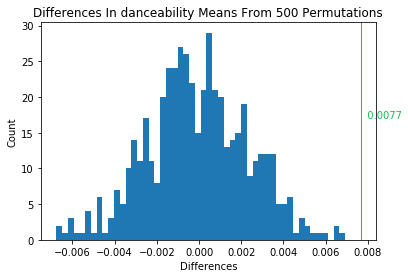

The green line represents the difference in our sample means.
The difference in means of our data:  0.007651


In [53]:
plot_permuted_diff(feature = 'danceability', data = danceability_data, sample = sample_difference('danceability'))
print("The difference in means of our data: ", sample_difference('danceability'))

In [54]:
permutation_p_value(data = danceability_data, feature = 'danceability')

Permutation Test Results
.....
p_value:  0.00000000


In [55]:
t_test_means(feature = 'danceability')

T-Test Results
.....
T-Statistic: -3.171799097435241
Degress of Freedom: 16240
Critical Value: 1.6449474604860919
p-value: 0.00000058


<h4> Conclusion: Are we dancing at home? </h4>
<p> The average danceability score actually <em> increased </em> by 0.0077. While this is the smallest change we've seen thus far, our analysis proved statistically significant, yielding a 5.8 x 10e-7 p-value. Both p-values from our permutations and t-test came extremely close to 0. Music suitable to dancing appears to be just as appealing alone as when with others. Maybe, without fearing judgement from our peers, people are finally breaking out some moves in the privacy of their homes.

---

<h3> 7. Valence </h3>

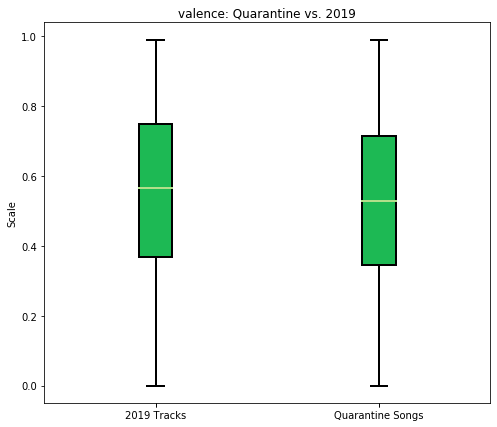

In [56]:
box_plot_comparisons('valence')

In [57]:
print_means('valence')

Mean valence value for 2019:  
0.5529
Mean valence value for Quarantine:  
0.5278

Difference in means from 2019 to Quarantine:
-0.0250
Percent change from 2019 mean to Quarantine mean:
-4.53%


<h4> Evaluation of Significance: Valence </h4> 

In [58]:
print("The difference in mean valence between Quarantine and 2019 songs:")
print(sample_difference('valence'))

The difference in mean valence between Quarantine and 2019 songs:
-0.025037


In [59]:
valence_data = permuted_diff_list(feature = 'valence')

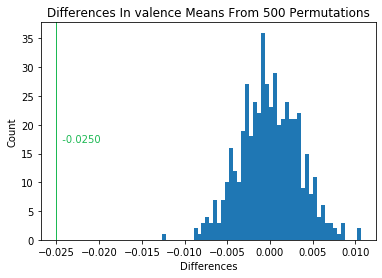

The green line represents the difference in our sample means.
The difference in means of our data:  -0.025037


In [60]:
plot_permuted_diff(feature = 'valence', data = valence_data, sample = sample_difference('valence'))
print("The difference in means of our data: ", sample_difference('valence'))

In [61]:
permutation_p_value(data = valence_data, feature = 'valence')

Permutation Test Results
.....
p_value:  0.00000000


In [62]:
t_test_means(feature = 'valence')

T-Test Results
.....
T-Statistic: 6.7228745306290945
Degress of Freedom: 16240
Critical Value: 1.6449474604860919
p-value: 0.00000000


<h4> Conclusion: Is there value in valence? </h4>
<p> The mean acousticness in 2019 songs decreased by 0.0250 on a 0 to 1 scale, going from 0.5529 down to 0.5278 mean valence in Quarantine songs. Further, with both p-values approaching 0.000000, it is clear that a percentage decrease of this size is certainly statistically significant.

---

<h3> 8. Acousticness </h3>

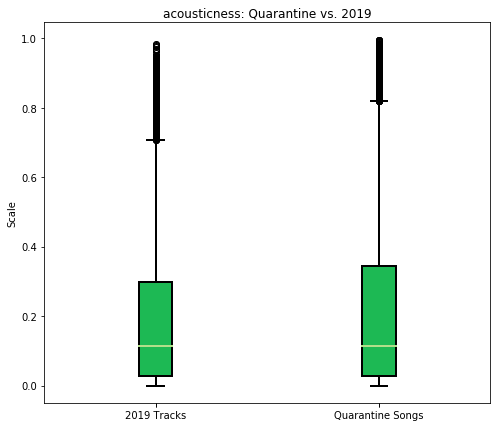

In [63]:
box_plot_comparisons('acousticness')

In [64]:
print_means('acousticness')

Mean acousticness value for 2019:  
0.2017
Mean acousticness value for Quarantine:  
0.2236

Difference in means from 2019 to Quarantine:
0.0219
Percent change from 2019 mean to Quarantine mean:
10.86%


<h4> Evaluation of Significance: Acousticness </h4> 

In [65]:
print("The difference in mean acousticness between Quarantine and 2019 songs:")
print(sample_difference('acousticness'))

The difference in mean acousticness between Quarantine and 2019 songs:
0.021897


In [66]:
acousticness_data = permuted_diff_list(feature = 'acousticness')

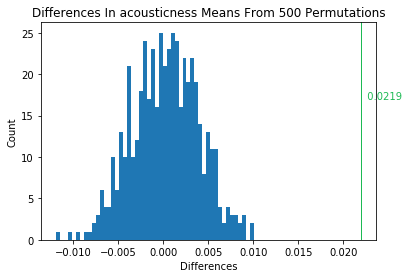

The green line represents the difference in our sample means.
The difference in means of our data:  0.021897


In [67]:
plot_permuted_diff(feature = 'acousticness', data = acousticness_data, sample = sample_difference('acousticness'))
print("The difference in means of our data: ", sample_difference('acousticness'))

In [68]:
permutation_p_value(data = acousticness_data, feature = 'acousticness')

Permutation Test Results
.....
p_value:  0.00000000


In [69]:
t_test_means(feature = 'acousticness')

T-Test Results
.....
T-Statistic: -5.763163457395098
Degress of Freedom: 16240
Critical Value: 1.6449474604860919
p-value: 0.00000000


<h4> Conclusion: How are the acoustics during quarantine? </h4>
<p>  The Quarantine sample mean decreased by 0.022, a 10.86% increase from the 2019 sample mean. Given both p-values (simulation and T-test) approached 0, this is a statistically significant change. It is hard to place a reason for this change, perhaps acoustic music is less comforting during a a dreary time? 

---

<h3> 9. Speechiness </h3>

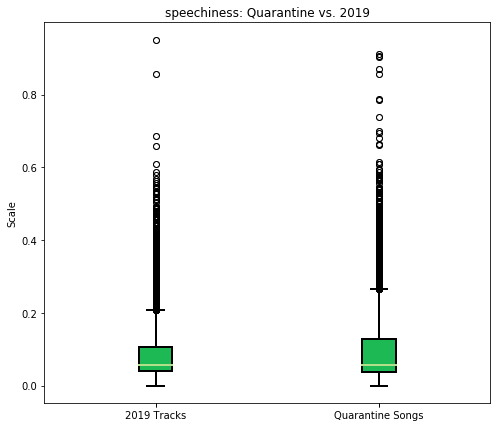

In [70]:
box_plot_comparisons('speechiness')

In [71]:
print_means('speechiness')

Mean speechiness value for 2019:  
0.0926
Mean speechiness value for Quarantine:  
0.1059

Difference in means from 2019 to Quarantine:
0.0133
Percent change from 2019 mean to Quarantine mean:
14.32%


<h4> Evaluation of Significance: Speechiness </h4> 

In [72]:
print("The difference in mean speechiness between Quarantine and 2019 songs:")
print(sample_difference('speechiness'))

The difference in mean speechiness between Quarantine and 2019 songs:
0.01326


In [73]:
speechiness_data = permuted_diff_list(feature = 'speechiness')

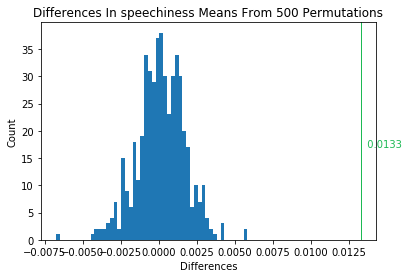

The green line represents the difference in our sample means.
The difference in means of our data:  0.01326


In [74]:
plot_permuted_diff(feature = 'speechiness', data = speechiness_data, sample = sample_difference('speechiness'))
print("The difference in means of our data: ", sample_difference('speechiness'))

In [75]:
permutation_p_value(data = speechiness_data, feature = 'speechiness')

Permutation Test Results
.....
p_value:  0.00000000


In [76]:
t_test_means(feature = 'speechiness')

T-Test Results
.....
T-Statistic: -8.65856334502017
Degress of Freedom: 16240
Critical Value: 1.6449474604860919
p-value: 0.00000000


<h4> Conclusion: Hard to <em> rap </em> our head around this one... </h4>
<p> The mean speechiness value for 2019, 0.0926, increased by 14.32% in the Quarantine sample, to 0.1059. While the fractional (0.0133) difference seems slight, one must remember the mere size of our sample size. As both p-values were approximately 0, it is again almost impossible this was due to random chance. Admittedly, the change is not as significant as we've seen with other audio features, but it can't be ignored. People are listening to music with slightly more words. Lyrics, like poetry, often inspire and motivate us - and maybe we are turning to rap music for answers? Our final thoughts will provide a thorough explanation of this theme.

---

<h3> 10. Tempo </h3>

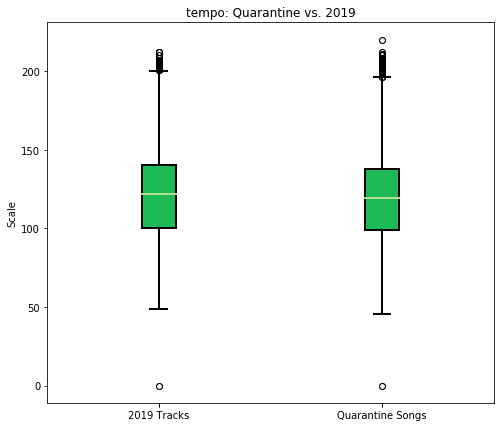

In [77]:
box_plot_comparisons('tempo')

In [78]:
print_means('tempo')

Mean tempo value for 2019:  
123.1222
Mean tempo value for Quarantine:  
120.2803

Difference in means from 2019 to Quarantine:
-2.8419
Percent change from 2019 mean to Quarantine mean:
-2.31%


<h4> Evaluation of Significance: Tempo </h4> 

In [79]:
print("The difference in mean tempo between Quarantine and 2019 songs:")
print(sample_difference('tempo'))

The difference in mean tempo between Quarantine and 2019 songs:
-2.841892


In [80]:
tempo_data = permuted_diff_list(feature = 'tempo')

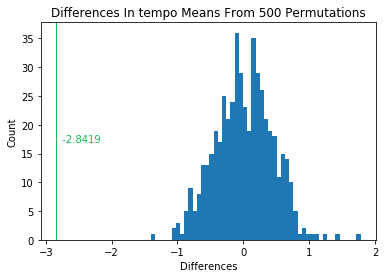

The green line represents the difference in our sample means.
The difference in means of our data:  -2.841892


In [81]:
plot_permuted_diff(feature = 'tempo', data = tempo_data, sample = sample_difference('tempo'))
print("The difference in means of our data: ", sample_difference('tempo'))

In [82]:
permutation_p_value(data = tempo_data, feature = 'tempo')

Permutation Test Results
.....
p_value:  0.00000000


In [83]:
t_test_means(feature = 'tempo')

T-Test Results
.....
T-Statistic: 6.36062944442041
Degress of Freedom: 16240
Critical Value: 1.6449474604860919
p-value: 0.00000000


<h4> Conclusion on Tempo: Could quarantine fo any slower? </h4>
<p> As predicted, the average tempo of the Quarantine songs decreased from 2019, by 2.84 beats per second. A change of this size is certainly statistically significant, yielding p-scores approximately equal to 0 on the simulation and t-test. While the tempo does not exactly correlate with mood, this supports the thoery that people listen to sadder, slower, less energetic music while sitting at home. Of course, not all of the audio features supported this theme, but tempo clearly does. 

---
---

<h2> Concluding Thoughts </h2>

<p>How has our music streaming changed since quarantine? Each of the ten different audio features we’ve analyzed offered unique insight into our listening choices, and the analysis of our streaming data has illustrated exactly how these choices fluctuated.</p>

<p>The most notable and statistically significant discovery of the quantitative audio features was the decrease in energy. As for our categorical variables, the proportion of the songs that we listen to that are explicit has grown by 14.41% since 2019; a statistically significant difference that forces us to wonder why people are choosing to listen to more explicit songs than before. Other variables like speechiness and acousticness had small increases, while tempo and valence had smaller decreases, allowing us to make inferences about why quarantine is affecting these features.</p>

<p>While most of these differences in sample means seem somewhat fractional, given the considerable sample size, they hold significant weight. We are confident, due to the strength of our statistical significance evaluations, that differences in sample means and proportions for each audio feature reflect the actual listening choices of people in quarantine. However, we are less confident in our causation explanations. For example, danceability’s slight increase does not seem logical. Likewise, the proportion of songs with a significant mode increased. If we had analyzed datasets from 2018, 2017, 2016, and even 2015, we would better understand the variability of features like danceability from year to year, explaining these seemingly nonsensical increases.</p>

<p>Another improvement of this research opportunity would be to analyze what genres and radio stations people are listening to more often. Our analysis only looked at self-made playlists, rather than streaming fluctuations in music genres, podcasts, or individual artists. The amount of people listening to these unique platform channels is always fluctuating, providing ample room for further research.</p>

<p>This research project has been a rewarding and challenging journey, providing hands-on experience in both API web scraping and analyzing complex data. We are proud of our work, and grateful to the caring support-system INFO 2950 provides to make it all possible.</p>

<h3> Source Code </h3>

- GitHub Repository: 
    https://github.com/kzo2/Info-2950-Final-Project

<h3> Acknowledgements </h3>

- The Spotify Web API Reference Documentation:
https://developer.spotify.com/documentation/web-api/ 
- Bar Charts: https://python-graph-gallery.com/11-grouped-barplot/
- Boxplots: http://blog.bharatbhole.com/creating-boxplots-with-matplotlib/
- T-Tests: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html, https://towardsdatascience.com/inferential-statistics-series-t-test-using-numpy-2718f8f9bf2f
- Professor David Mimno and the entire INFO 2950 Teaching Staff!